# Understanding the Perceptron

## by [Luis Martí](http://lmarti.com) - [IC](www.ic.uff.br)/[UFF](www.uff.br)

In this notebook we are doing to study the [Perceptron](https://en.wikipedia.org/wiki/Perceptron) and its learning algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Implementing the Perceptron

We are going to start implementing a Perceptron as a class. Bear in mind that I have made the implementation as clear and easy to follow as possible and hence there are many points where it can be improved.

In [2]:
class Perceptron:
    '''A simple Perceptron implementation.'''
    def __init__(self, weights, bias, alpha=0.1):
        self.weights = weights
        self.bias = bias
        self.alpha = alpha
    
    def propagate(self, x):
        return self.activation(self.net(x)) 
        
    def activation(self, net):
        if net > 0:
            return 1
        return 0
    
    def net(self, x):
        return np.dot(self.weights, x) + self.bias
    
    def learn(self, x, y):
        y_hat = self.propagate(x)
        self.weights = [ w_i + self.alpha*x_i*(y-y_hat) for (w_i, x_i) in zip(self.weights, x)]
        self.bias = self.bias + self.alpha*(y-y_hat)
        return np.abs(y_hat - y)

Perhaps the most tricky element of our `Perceptron` class is the `learn` method. It goes by calculating the prediction of the Perceptron, $\hat{y}$, as
$$\hat{y} = f[\mathbf{w}\cdot\mathbf{x} + b] = f[ w_{1}x_{1} + w_2x_{2} + \cdots + w_nx_{n}+b].$$

After that we update the weight and the bias using the Perceptron rule,
$$w_i = w_i + \alpha (y - \hat{y}) x_{i} \,, \forall i: 1 \leq i \leq n,$$
$$ b = b + \alpha (y - \hat{y}).$$

Here $\alpha$ is known as the learning rate.

## Preparing the data set

After having the Perceptron implementation ready we need an example data set.

We are going to create a dataset containing random points such that $\mathbf{x}\in\left[0,1\right]^2$.

In [3]:
size = 100 # data set size

In [4]:
data = pd.DataFrame(columns=('x_1', 'x_2'), data=np.random.uniform(size=(size,2)))

So far, our data set looks like this:

In [5]:
data.head()

,x_1,x_2
0,0.987942,0.245243
1,0.569427,0.100109
2,0.534109,0.370768
3,0.079446,0.788420
4,0.001418,0.597607


We need to add a *target* or *classification* attribute. In this example, we are going to make this target to be equal to one if the point lies in the uppper-right triangle of the $\left[0,1\right]\times\left[0,1\right]$ square:
$$ y = 1\iff x_1 + x_2 > 1; y = 0\ \text{otherwise}.$$

Lets code this:

In [6]:
def condition(x):
    if np.sum(x) > 1:
        return 1
    return 0

...and apply this condition to the data set.

In [7]:
data['y'] = data.apply(condition, axis=1)

The resulting data set looks like this:

In [8]:
data.head()

,x_1,x_2,y
0,0.987942,0.245243,1
1,0.569427,0.100109,0
2,0.534109,0.370768,0
3,0.079446,0.788420,0
4,0.001418,0.597607,0


We can now take a better look at the data set in graphical form:

In [9]:
def plot_data(data, ax):
    data[data.y==1].plot(kind='scatter', x='x_1', y='x_2', color='Red', ax=ax)
    data[data.y==0].plot(kind='scatter', x='x_1', y='x_2', color='Gray', ax=ax)
    ax.set_xlim(-0.1,1.1); ax.set_ylim(-0.1,1.1)

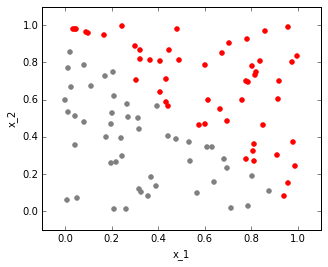

In [10]:
fig = plt.figure(figsize=(5,4))
ax = fig.gca()
plot_data(data, ax)

## Iterating the data set

Having the data set we can now code how the Perceptron learns it.

In [11]:
def learn_data(perceptron, data):
    'Returns the number of errors made.'
    count = 0 
    for i, row in data.iterrows():
        count += perceptron.learn(row[0:2], row[2])
    return count

## Visualizing learning

We need now to plot the decision boundary or threshold of the Perceptron.

To calculate it we start with the equation that describes the boundary,
$$w_1x_1+w_2x_2 + b =0.$$

From it we can obtain $x_2$ from a given $x_1$ applying a fairy simple math
$$x_2 = \frac{-w_1x_1-b}{w_2}.$$

In [12]:
def threshold(perceptron, x_1):
    return (- perceptron.weights[0] * x_1 - perceptron.bias) / perceptron.weights[1]

In [13]:
def plot_perceptron_threshold(perceptron, ax):
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    
    x2s = [threshold(perceptron, x1) for x1 in xlim]
    ax.plot(xlim, x2s)
    
    ax.set_xlim(-0.1,1.1); ax.set_ylim(-0.1,1.1)

A function that plots a Perceptron and the data.

In [14]:
def plot_all(perceptron, data, t, ax=None):
    if not ax:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()
    plot_data(data, ax)
    plot_perceptron_threshold(perceptron, ax)
    
    ax.set_title('$t='+str(t+1)+'$')

## Our Perceptron in action

All set now! Let's create a Perceptron and train it. 

*Note*: Normally the initial weights and the bias should be set to "small" random values. I am setting them by hand to a value that I know that looks good in the examples.

In [15]:
perceptron = Perceptron([0.1,-0.1],0.02)

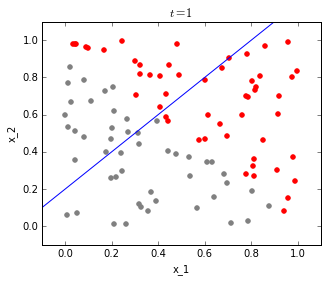

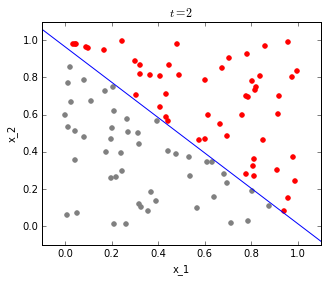

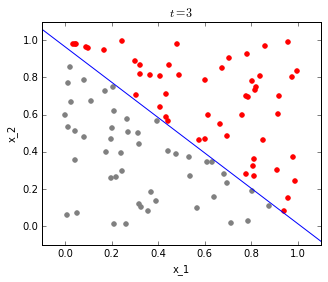

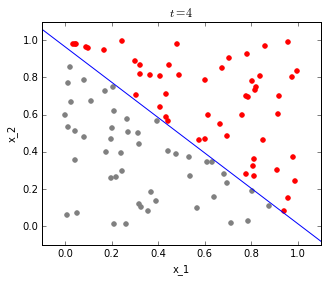

In [16]:
for t in range(4):
    plot_all(perceptron, data, t)
    learn_data(perceptron, data)

It is clear how the Perceptron threshold is adjusted to following the data set.

## Animating the Perceptron

This results are better understood in animated from.

In [17]:
from JSAnimation import IPython_display
from matplotlib import animation

In [18]:
def animate(frame_index, perceptron, data, ax):
    ax.clear()
    plot_data(data, ax=ax)
    ax.set_title('$t='+str(frame_index)+'$')
    
    if not frame_index:
        return None
    plot_perceptron_threshold(perceptron, ax=ax)
    learn_data(perceptron, data)
    return None


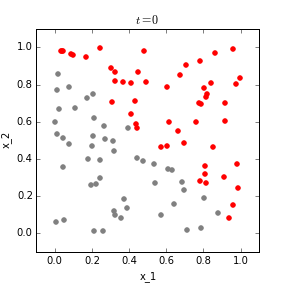
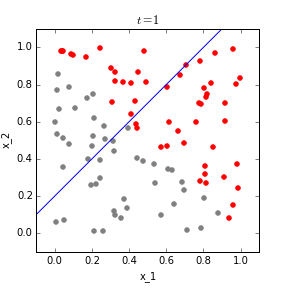
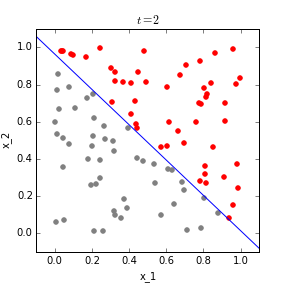
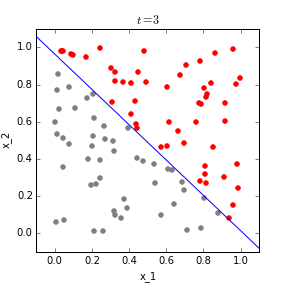
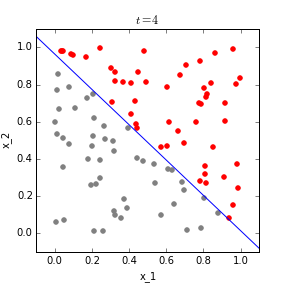
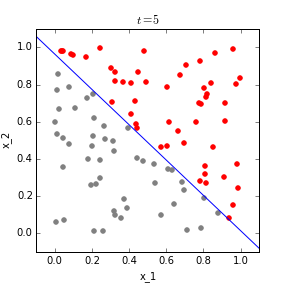
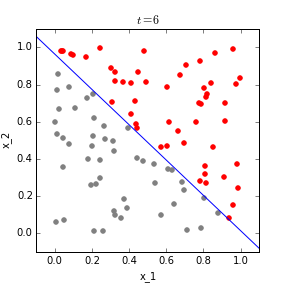
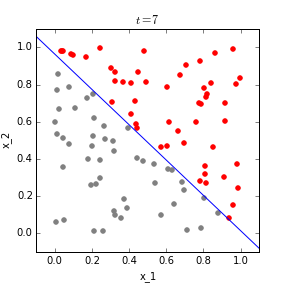
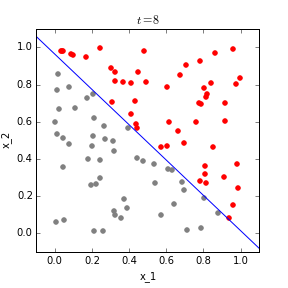
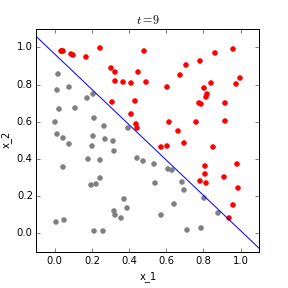
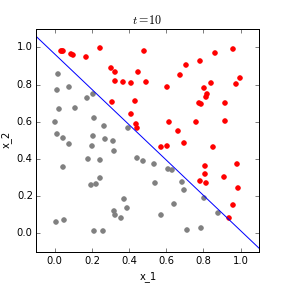
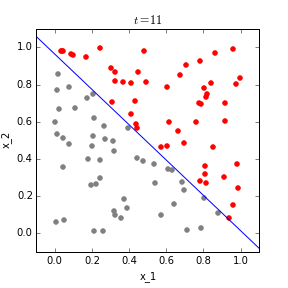
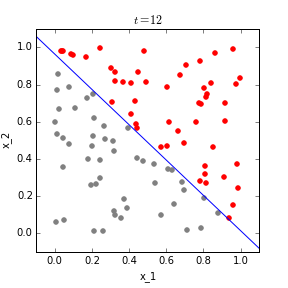
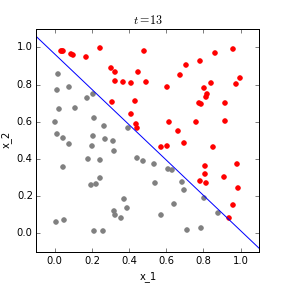
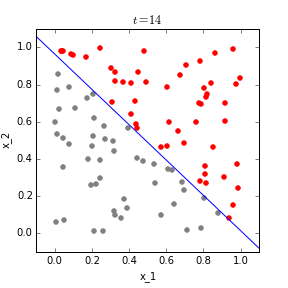
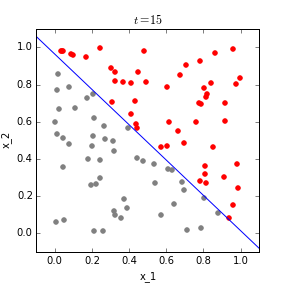
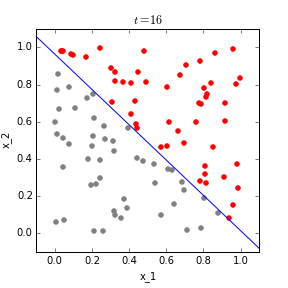
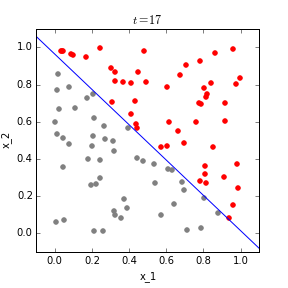
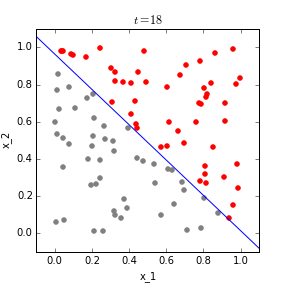
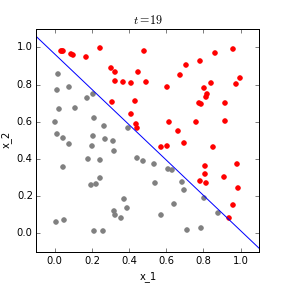
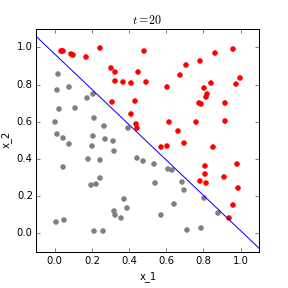
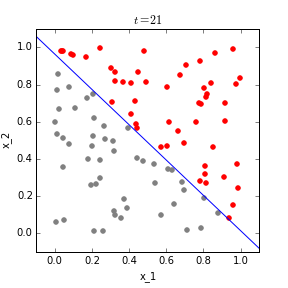
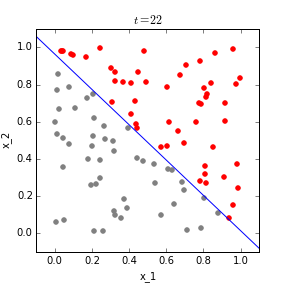
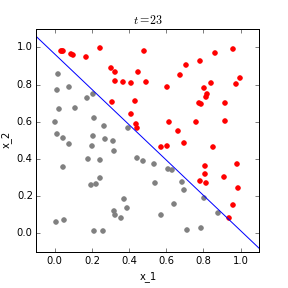
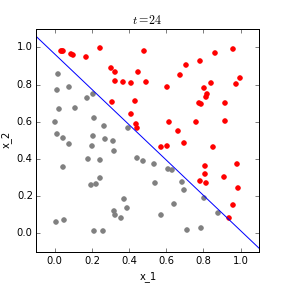

In [19]:
fig = plt.figure(figsize=(4,4))
ax = fig.gca()

perceptron = Perceptron([0.1,-0.1],0.02)

animation.FuncAnimation(fig, lambda i: animate(i, perceptron, data, ax), frames=25, interval=600, 
                               blit=True)

## Self-study

* Experiment with the learning rate ($\alpha$). How it impacts learning?
* Create a new data set with a non-linear boundary. What happens now with our Perceptron?

## Environment details

In [20]:
%load_ext watermark
%watermark -a "Luis Martí - http://lmarti.com" -d -u -v -m -p numpy,pandas

Luis Martí - http://lmarti.com 
Last updated: 09/21/2015 

CPython 3.4.3
IPython 4.0.0

numpy 1.9.2
pandas 0.16.2

compiler   : GCC 4.2.1 (Apple Inc. build 5577)
system     : Darwin
release    : 14.5.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
